In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [115]:
df=pd.read_csv("airlines_flights_data")
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49994,Vistara,UK-821,Mumbai,Early_Morning,one,Night,Delhi,Economy,17.17,36,5224
49995,49995,Vistara,UK-877,Mumbai,Morning,one,Afternoon,Delhi,Economy,4.92,36,5232
49996,49996,Vistara,UK-873,Mumbai,Early_Morning,one,Afternoon,Delhi,Economy,6.33,36,5232
49997,49997,Vistara,UK-873,Mumbai,Early_Morning,one,Afternoon,Delhi,Economy,9.33,36,5232


In [116]:
df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [117]:
df.dtypes

index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [118]:
df = df.drop(columns=["index"])


In [119]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
49994,Vistara,UK-821,Mumbai,Early_Morning,one,Night,Delhi,Economy,17.17,36,5224
49995,Vistara,UK-877,Mumbai,Morning,one,Afternoon,Delhi,Economy,4.92,36,5232
49996,Vistara,UK-873,Mumbai,Early_Morning,one,Afternoon,Delhi,Economy,6.33,36,5232
49997,Vistara,UK-873,Mumbai,Early_Morning,one,Afternoon,Delhi,Economy,9.33,36,5232


In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
le=LabelEncoder()
df["airline"]=le.fit_transform(df["airline"])

In [122]:
le1=LabelEncoder()
df["flight"]=le1.fit_transform(df["flight"])

In [123]:
le2=LabelEncoder()
df["source_city"]=le2.fit_transform(df["source_city"])

In [124]:
le3=LabelEncoder()
df["departure_time"]=le3.fit_transform(df["departure_time"])

In [125]:
le4=LabelEncoder()
df["stops"]=le4.fit_transform(df["stops"])

In [126]:
le5=LabelEncoder()
df["arrival_time"]=le5.fit_transform(df["arrival_time"])

In [127]:
le6=LabelEncoder()
df["destination_city"]=le6.fit_transform(df["destination_city"])

In [128]:
le7=LabelEncoder()
df["class"]=le7.fit_transform(df["class"])

In [129]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,539,0,2,2,5,5,0,2.17,1,5953
1,4,520,0,1,2,4,5,0,2.33,1,5953
2,0,464,0,1,2,1,5,0,2.17,1,5956
3,5,642,0,4,2,0,5,0,2.25,1,5955
4,5,632,0,4,2,4,5,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
49994,5,586,1,1,0,5,2,0,17.17,36,5224
49995,5,611,1,4,0,0,2,0,4.92,36,5232
49996,5,609,1,1,0,0,2,0,6.33,36,5232
49997,5,609,1,1,0,0,2,0,9.33,36,5232


In [130]:
print(df.duplicated().sum())

0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           49999 non-null  int64  
 1   flight            49999 non-null  int64  
 2   source_city       49999 non-null  int64  
 3   departure_time    49999 non-null  int64  
 4   stops             49999 non-null  int64  
 5   arrival_time      49999 non-null  int64  
 6   destination_city  49999 non-null  int64  
 7   class             49999 non-null  int64  
 8   duration          49999 non-null  float64
 9   days_left         49999 non-null  int64  
 10  price             49999 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 4.2 MB


In [132]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,539,0,2,2,5,5,0,2.17,1,5953
1,4,520,0,1,2,4,5,0,2.33,1,5953
2,0,464,0,1,2,1,5,0,2.17,1,5956
3,5,642,0,4,2,0,5,0,2.25,1,5955
4,5,632,0,4,2,4,5,0,2.33,1,5955


In [133]:
df.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
49994,5,586,1,1,0,5,2,0,17.17,36,5224
49995,5,611,1,4,0,0,2,0,4.92,36,5232
49996,5,609,1,1,0,0,2,0,6.33,36,5232
49997,5,609,1,1,0,0,2,0,9.33,36,5232
49998,5,610,1,2,0,5,2,0,27.50,36,5232


In [134]:
df.describe()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.0,49999.000000,49999.000000,49999.000000
mean,2.733355,385.479910,0.139443,2.229305,0.416128,2.970439,2.517630,0.0,10.666165,25.192064,6315.665013
std,1.756879,187.906288,0.346411,1.683150,0.779734,1.792567,1.821466,0.0,7.136431,13.321437,3710.383718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.830000,1.000000,1998.000000
25%,1.000000,247.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.0,5.330000,14.000000,3999.000000
50%,3.000000,399.000000,0.000000,2.000000,0.000000,3.000000,3.000000,0.0,9.170000,25.000000,5549.000000
75%,5.000000,577.000000,0.000000,4.000000,0.000000,5.000000,4.000000,0.0,14.500000,36.000000,7425.000000
max,5.000000,643.000000,1.000000,5.000000,2.000000,5.000000,5.000000,0.0,39.670000,49.000000,35145.000000


In [135]:
df.shape

(49999, 11)

In [136]:
x=df.drop("price",axis=1)
y=df[["price"]]
x

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,539,0,2,2,5,5,0,2.17,1
1,4,520,0,1,2,4,5,0,2.33,1
2,0,464,0,1,2,1,5,0,2.17,1
3,5,642,0,4,2,0,5,0,2.25,1
4,5,632,0,4,2,4,5,0,2.33,1
...,...,...,...,...,...,...,...,...,...,...
49994,5,586,1,1,0,5,2,0,17.17,36
49995,5,611,1,4,0,0,2,0,4.92,36
49996,5,609,1,1,0,0,2,0,6.33,36
49997,5,609,1,1,0,0,2,0,9.33,36


In [137]:
y

,price
0,5953
1,5953
2,5956
3,5955
4,5955
...,...
49994,5224
49995,5232
49996,5232
49997,5232


##### EDA(Exploratory Data analysis)

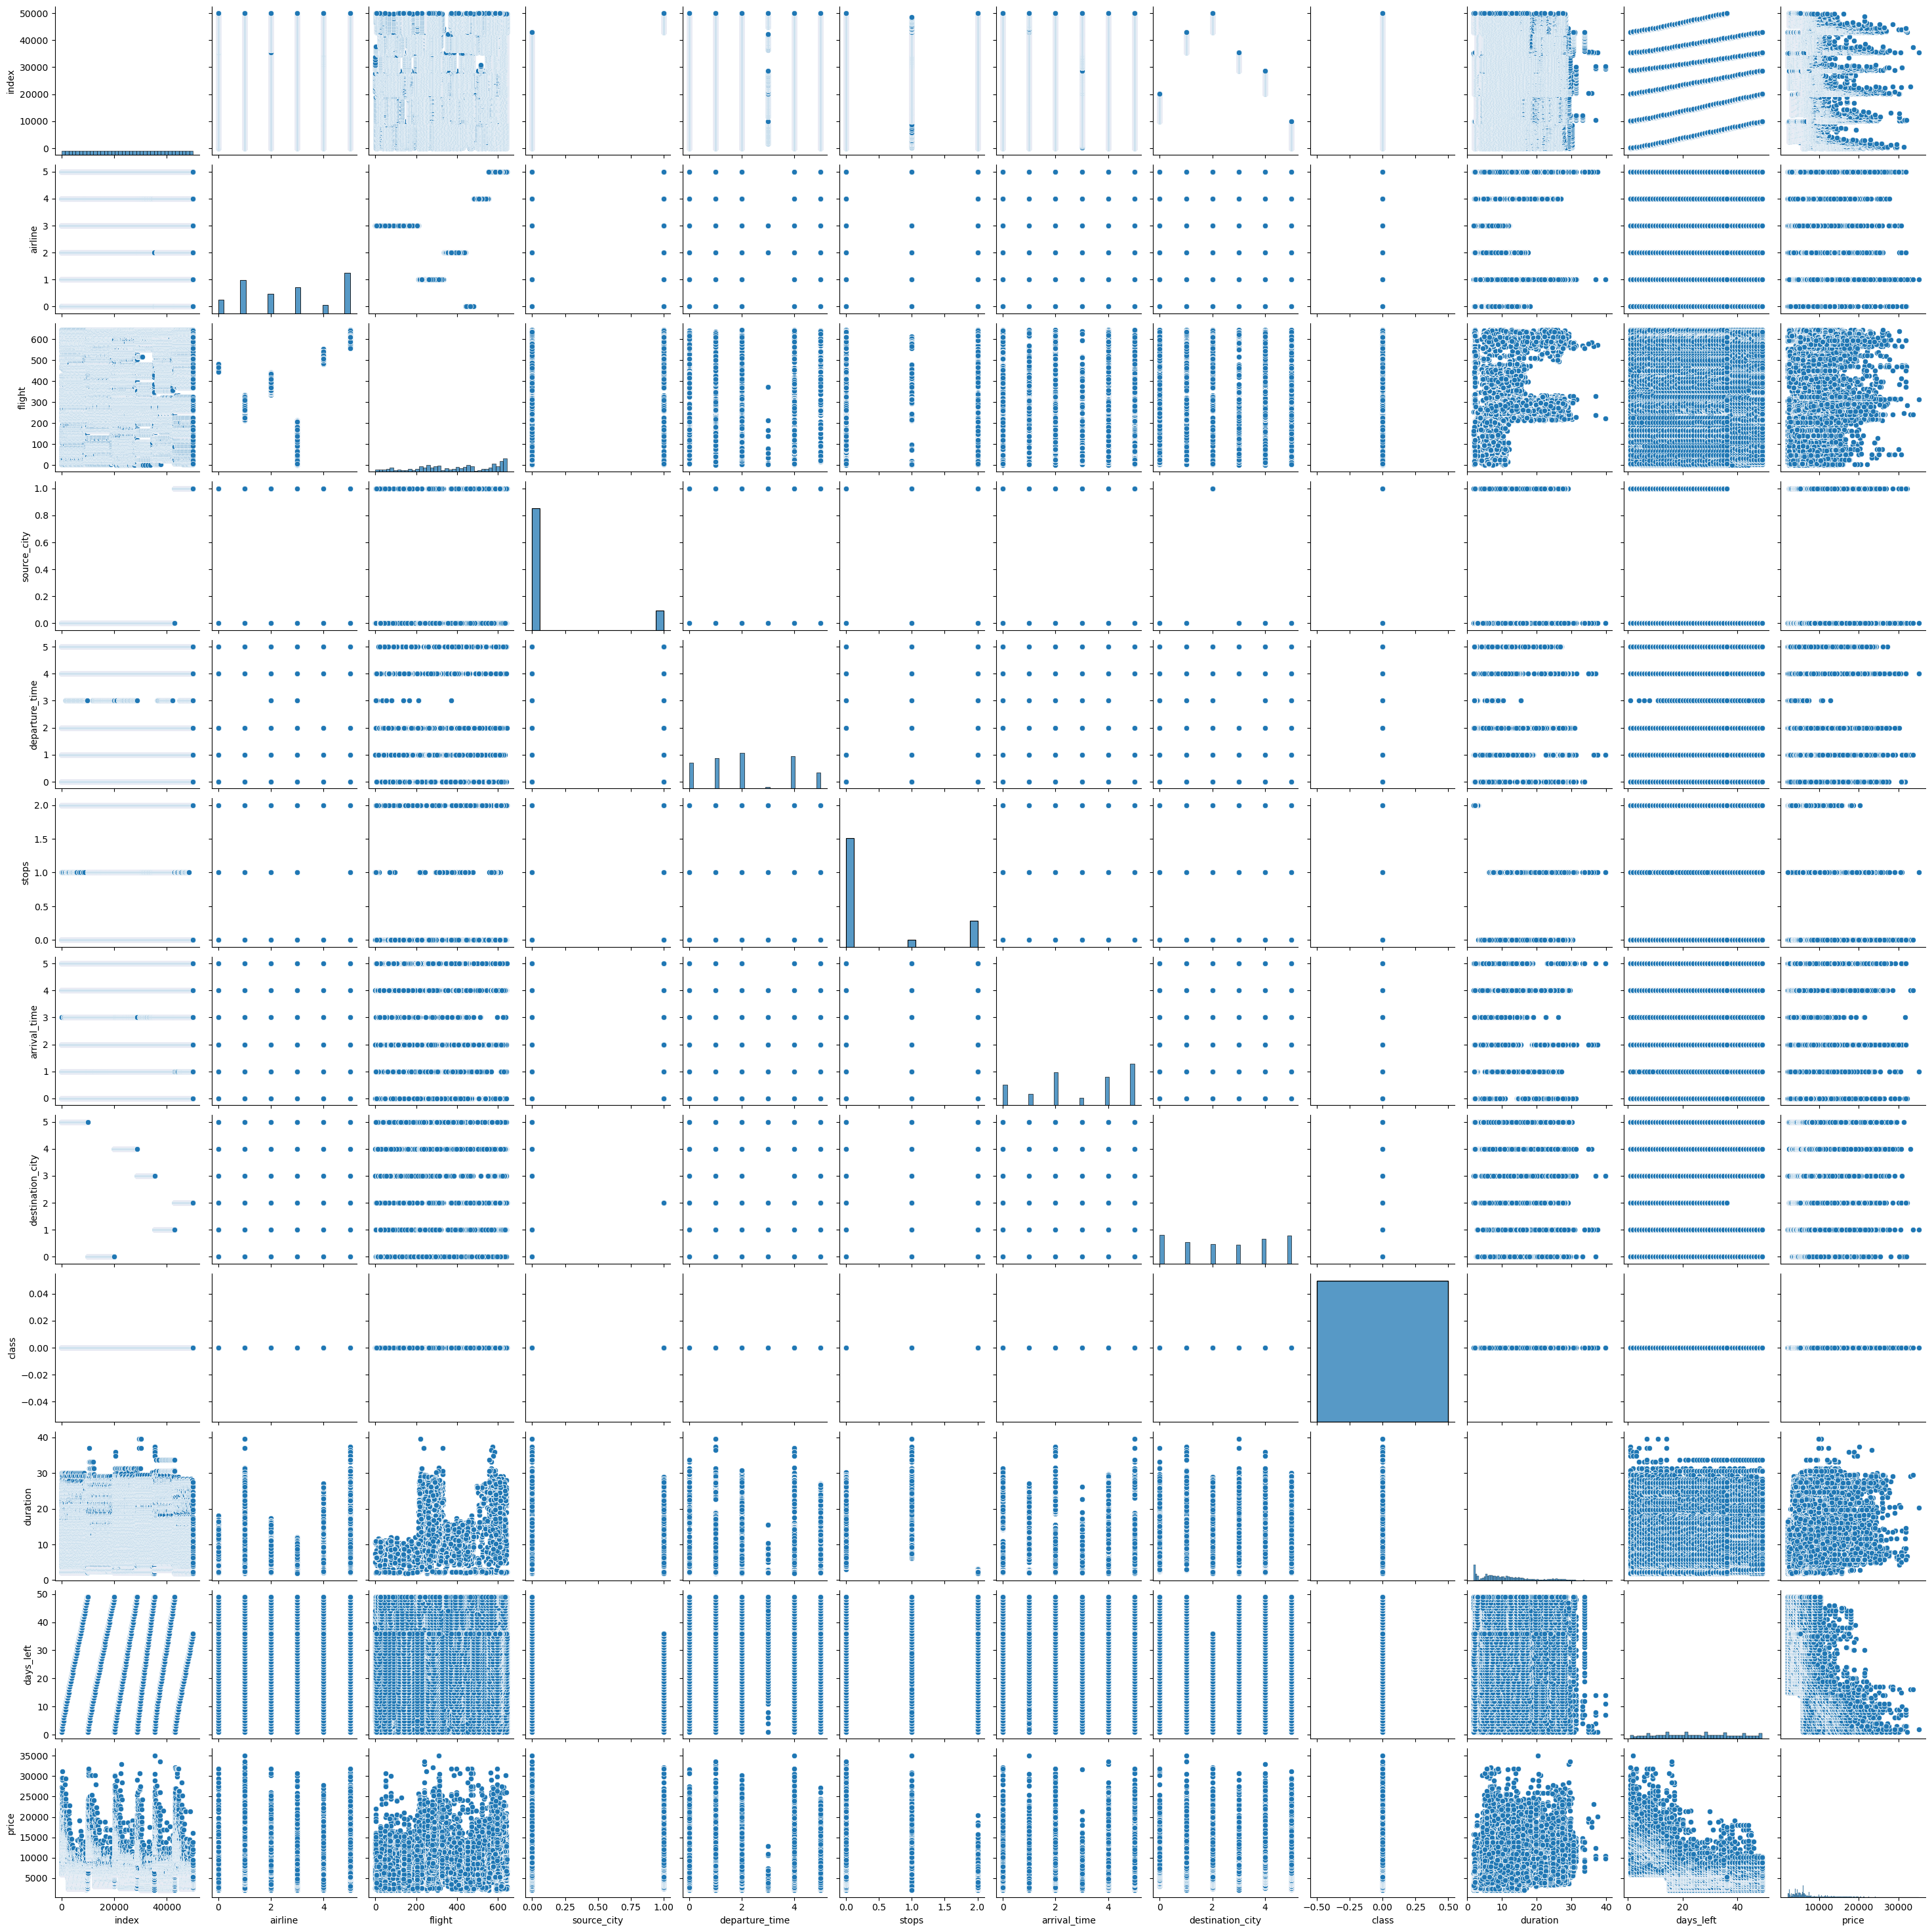

In [31]:
sns.pairplot(df)

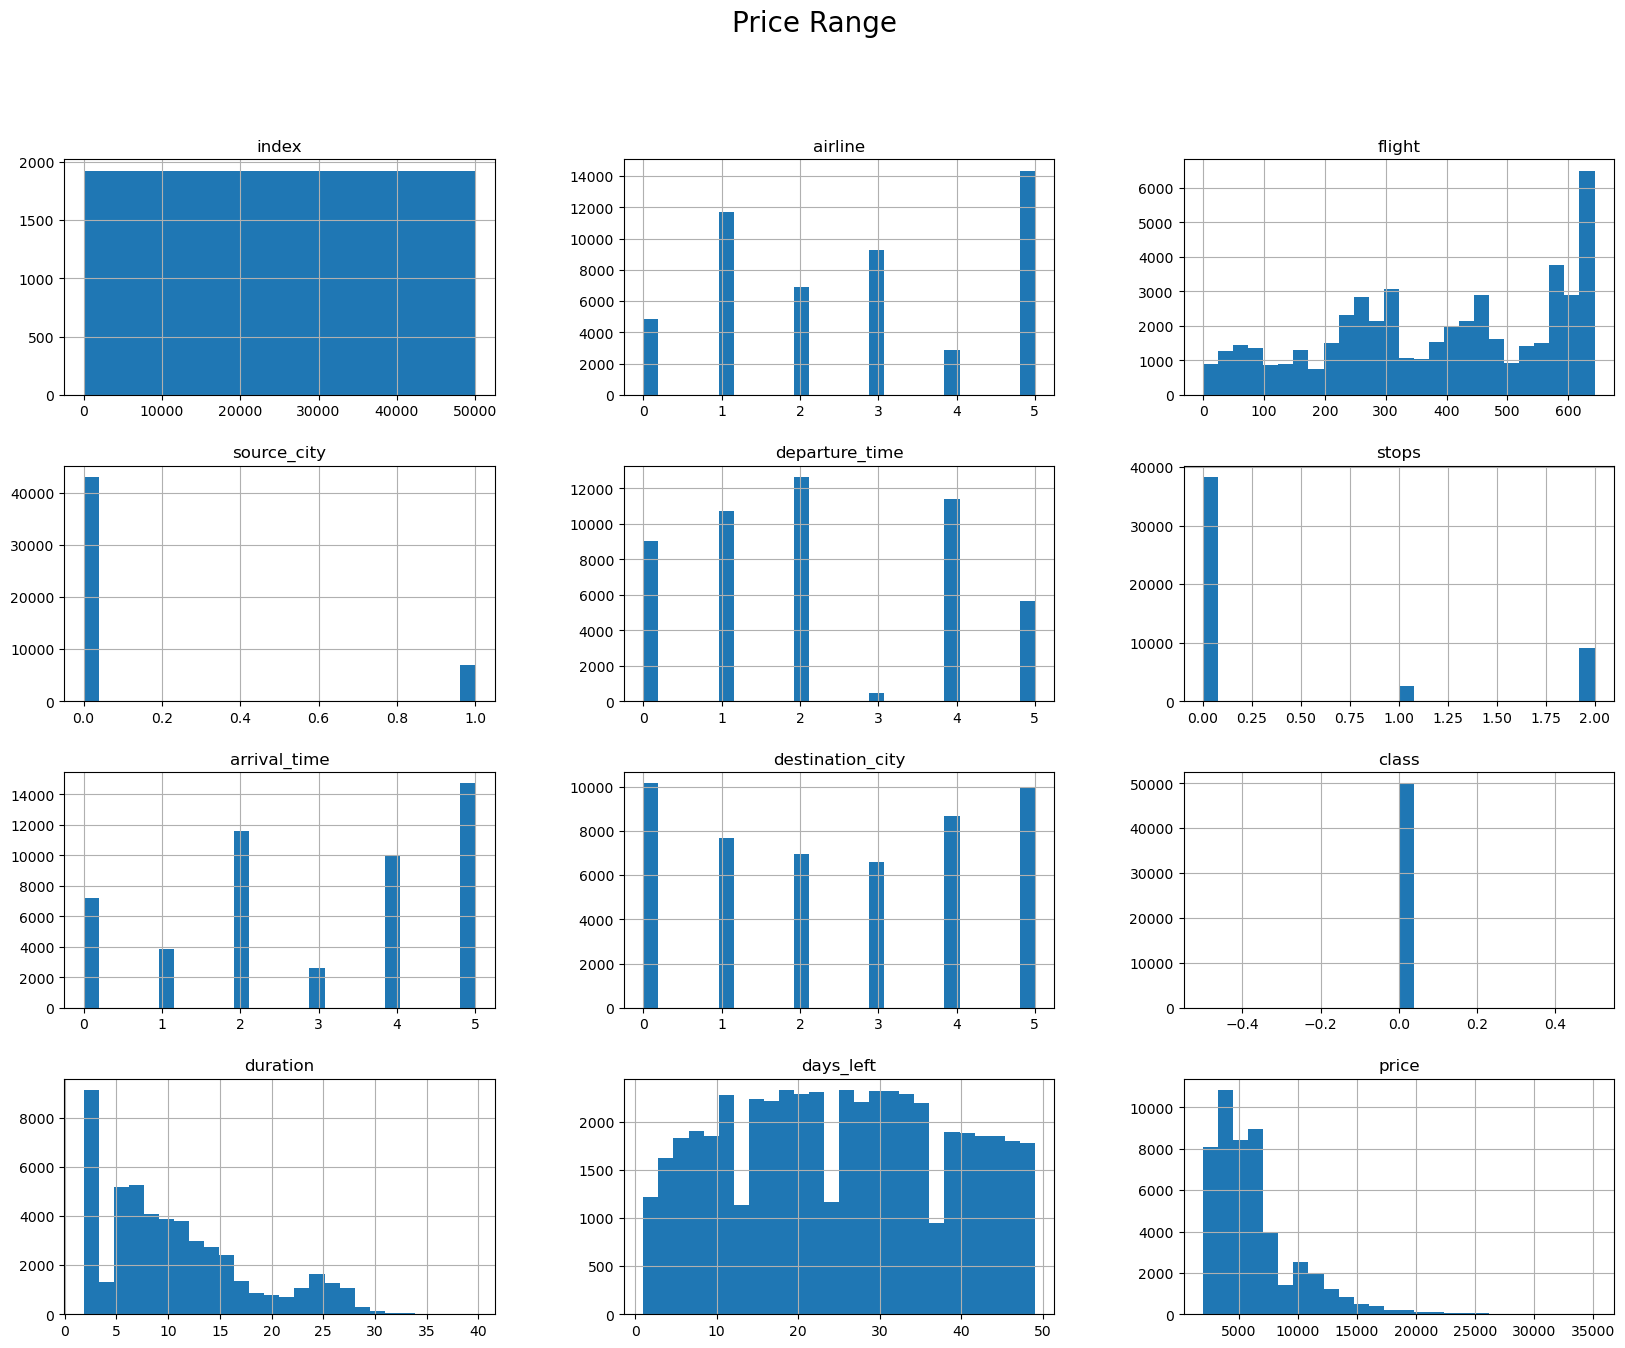

In [32]:
df.hist(figsize=(20,15),bins=26)
plt.suptitle("Price Range",fontsize=20)
plt.show()

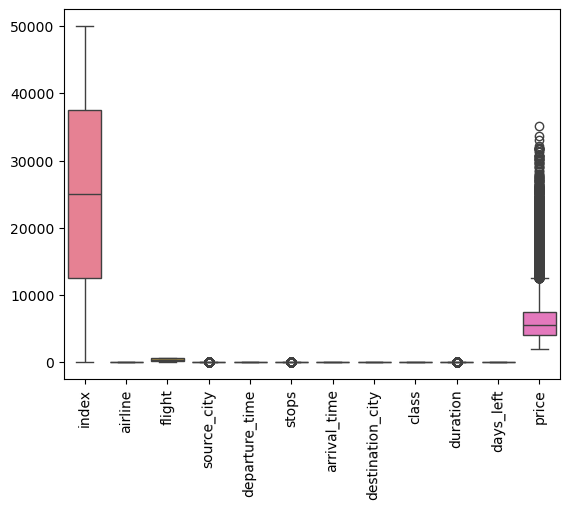

In [33]:
sns.boxplot(df)
plt.xticks(rotation=89.5)
plt.show()

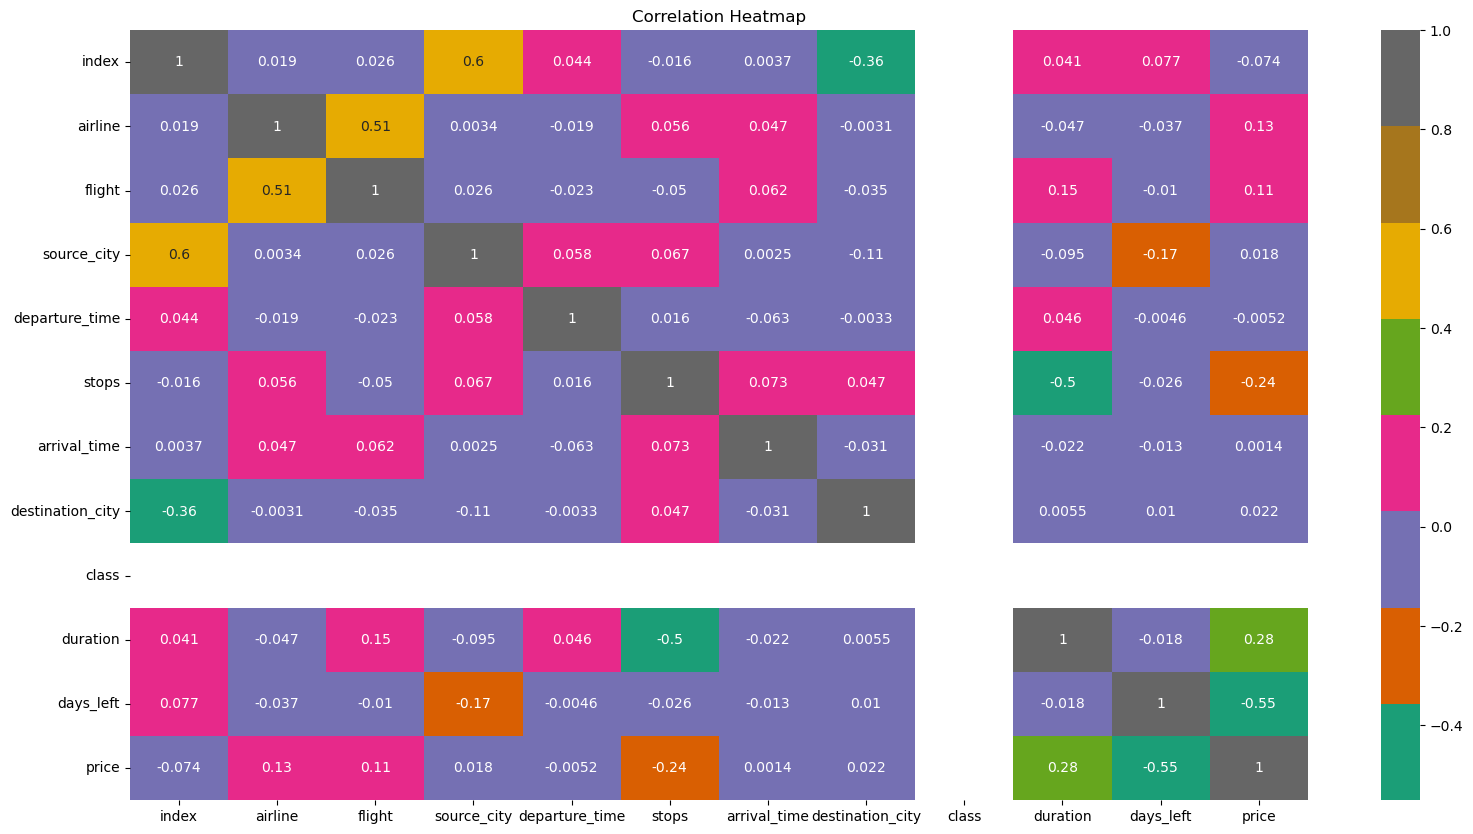

In [34]:
plt.figure(figsize=(19,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="Dark2")
plt.title("Correlation Heatmap")
plt.show()

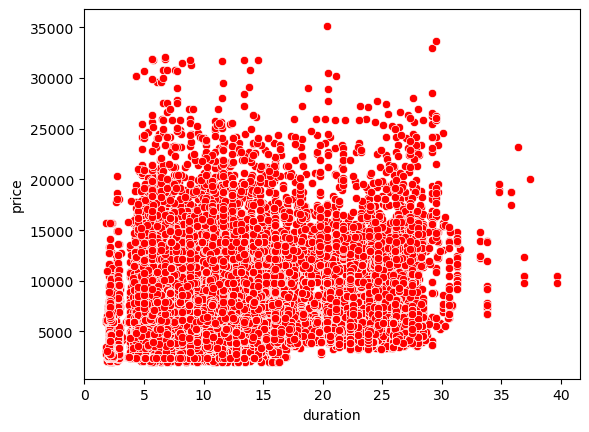

In [35]:
sns.scatterplot(data=df,x='duration',y='price',color='red')
plt.xlabel('duration')
plt.ylabel('price')
plt.show()

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=100)

In [140]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [141]:

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred=lr.predict(x_test)
y_pred

array([[6020.93266915],
       [6561.15754213],
       [5507.97543766],
       ...,
       [5869.4882119 ],
       [7020.00417292],
       [9718.40511765]])

In [52]:
lr.score(x_train,y_train)

0.41071885885238657

In [53]:
lr.score(x_test,y_test)

0.41594432041125085

#### Lasso Regression

In [54]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [55]:
lasso=Lasso(alpha=10)
lasso.fit(x_train,y_train)
y_pred_lasso=lasso.predict(x_test)

In [56]:
y_pred_lasso

array([6008.51437252, 6545.42918054, 5565.01634762, ..., 5864.35725219,
       7013.38835664, 9689.73085641])

In [57]:
lasso.score(x_train,y_train)

0.4106645745941945

In [58]:
lasso.score(x_test,y_test)

0.4157526375117516

#### Ridge Regression

In [59]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [60]:
ridge=Ridge(alpha=10)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [61]:
y_pred_ridge

array([6021.34025526, 6560.5942157 , 5508.2986721 , ..., 5870.03646161,
       7020.36840091, 9716.77491129])

In [62]:
ridge.score(x_train,y_train)

0.41071879497895725

In [63]:
ridge.score(x_test,y_test)

0.41593964008606477

#### Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
dtr=DecisionTreeRegressor()

In [66]:
dtr.fit(x,y)

DecisionTreeRegressor()

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [68]:
y_pred=dtr.predict(x_test)
y_pred

array([ 3090., 12150.,  5098., ...,  3569.,  9735.,  4426.])

In [69]:
dtr.score(x_train,y_train)

1.0

In [70]:
dtr.score(x_test,y_test)

1.0

In [71]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('r2_score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE: 0.0
MSE: 0.0
r2_score 1.0
RMSE 0.0


In [72]:
dtr.get_depth()

35

#### Random Forest

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [144]:
rf=RandomForestRegressor(n_estimators=45,random_state=34)

In [145]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=45, random_state=34)

In [146]:
y_pred=rf.predict(x_test)
y_pred

array([ 3121.28888889, 13134.4       ,  5168.62222222, ...,
        3445.55555556,  9827.2       ,  4426.        ])

In [147]:
rf.score(x_train,y_train)

0.9799686808584523

In [148]:
rf.score(x_test,y_test)

0.8580107383845323

In [149]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('r2_score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE: 552.2191252962963
MSE: 1941932.801090422
r2_score 0.8580107383845323
RMSE 1393.5324901452502


#### SVM

In [80]:
from sklearn.svm import SVR

In [81]:
linear_model=SVR(kernel="linear",C=1000)
(linear_model.fit(x_train,y_train))
print(linear_model.score(x_test,y_test))
print(linear_model.score(x_train,y_train))

0.37314190999716634
0.37325535202566584


In [82]:
svr_poly=SVR(kernel="poly",degree=4,C=500)
svr_poly.fit(x_train,y_train)
print(svr_poly.score(x_test,y_test))
print(svr_poly.score(x_train,y_train))

0.5985747941605949
0.6155898931347109


In [161]:
svm_sig=SVR(kernel="sigmoid",C=700)
svm_sig.fit(x_train,y_train)
svm_sig.score(x_test,y_test)
y_pred=svm_sig.predict(x_test)
print(mean_squared_error(y_test,y_pred))

13824402839.782545


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("r2 score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn=KNeighborsRegressor(n_neighbors=5)

In [ ]:
knn.fit(x_train,y_train)

In [ ]:
knn.score(x_test,y_test)

In [ ]:
knn.score(x_train,y_train)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("r2 score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

### Ensemble Model

#### ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adaboost=AdaBoostRegressor(n_estimators=50,learning_rate=0.3,random_state=1)

In [ ]:
adaboost.fit(x_train,y_train)

In [ ]:
adaboost.score(x_test,y_test)

In [ ]:
adaboost.score(x_train,y_train)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("r2 score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=100,random_state=12)
gbr.fit(x_train,y_train)

In [ ]:
gbr.score(x_test,y_test)

In [ ]:
gbr.score(x_train,y_train)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("r2 score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

#### XGBoosting

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb=XGBRegressor()

In [ ]:
xgb.fit(x_train,y_train)

In [ ]:
xgb.score(x_test,y_test)

In [ ]:
xgb.score(x_train,y_train)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("r2 score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

#### Hyperparameter Tuning

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lr_params = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

lr_grid = GridSearchCV(LinearRegression(), lr_params, cv=5)
lr_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]})

In [96]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [97]:
rf_params={"n_estimators":[10,50,100],
           "max_depth":[2,4,6,None]}
rf_grid=GridSearchCV(RandomForestRegressor(random_state=42),rf_params,cv=5)
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 4, 6, None],
                         'n_estimators': [10, 50, 100]})

In [98]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [99]:
dt_params={
    "max_depth":[2,4,6,None],
    "criterion":["squared_error","friedman_mse","absolute_error","poisson"]
}
dt_grid=GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=dt_params,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

dt_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 4, 6, None]},
             scoring='r2')

In [140]:
svr_params={"C":[0.1,1,10],
            "kernel":["linear","rbf"],
            "gamma":["scale","auto"]}
svr_grid=GridSearchCV(SVR(),svr_params,cv=5)
svr_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [141]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [142]:
kn_params={
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"],
    "metric":["minkowski","euclidean","manhattan"]
}
kn_grid=GridSearchCV(KNeighborsRegressor(),kn_params,cv=5)
kn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [143]:
ab_params={
    "n_estimators":[10,50,100,200],
    "estimator__max_depth":[2,4,6,None]
}
ab_grid=GridSearchCV(
    AdaBoostRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        random_state=42
    ),
    ab_params,
    cv=5
)
ab_grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42),
                                         random_state=42),
             param_grid={'estimator__max_depth': [2, 4, 6, None],
                         'n_estimators': [10, 50, 100, 200]})

In [144]:
xg_params={
    "n_estimators":[10,50,100,200],
    "max_depth":[2,4,6,8]
}

xg_grid=GridSearchCV(
    XGBRegressor(random_state=42,eval_metric="rmse"),
    xg_params,
    cv=5
)
xg_grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    feature_weights=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'n_estimators': [10, 50, 100, 200]})

In [145]:
gb_params={
    "n_estimators":[10,50,100,200],
    "max_depth":[2,3,4,5,6]
}
gb_grid=GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    cv=5
)
gb_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [10, 50, 100, 200]})

In [146]:
from sklearn.metrics import r2_score

models = {
    "Random Forest": rf_grid,
    "SVR": svr_grid,
    "Decision Tree": dt_grid,
    "KNNeighbors": kn_grid,
    "XGBoost": xg_grid
}

for name, grid in models.items():
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)

    
    r2 = r2_score(y_test, y_pred)

    print(f"{name}:")
    print(f"best param: {grid.best_params_}")
    print(f"R2 Score: {r2:.4f}\n")

Random Forest:
best param: {'max_depth': None, 'n_estimators': 100}
R2 Score: 0.8845

SVR:
best param: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
R2 Score: 0.3980

Decision Tree:
best param: {'criterion': 'poisson', 'max_depth': None}
R2 Score: 0.8062

KNNeighbors:
best param: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
R2 Score: 0.8032

XGBoost:
best param: {'max_depth': 8, 'n_estimators': 200}
R2 Score: 0.8768



In [147]:
# Access the best model
best_rf_model = rf_grid.best_estimator_
y_pred = best_rf_model.predict(x_test)

In [148]:
print(best_rf_model)

RandomForestRegressor(random_state=42)


In [150]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [151]:
import joblib
joblib.dump(rf,"project.pkl")

['project.pkl']

In [152]:
joblib.dump(sc,"scaler.pkl")

['scaler.pkl']

In [153]:
joblib.dump(le,"le.pkl")

['le.pkl']

In [154]:
joblib.dump(le1,"le1.pkl")

['le1.pkl']

In [155]:
joblib.dump(le2,"le2.pkl")

['le2.pkl']

In [156]:
joblib.dump(le3,"le3.pkl")

['le3.pkl']

In [157]:
joblib.dump(le4,"le4.pkl")

['le4.pkl']

In [158]:
joblib.dump(le5,"le5.pkl")

['le5.pkl']

In [159]:
joblib.dump(le6,"le6.pkl")

['le6.pkl']

In [160]:
joblib.dump(le7,"le7.pkl")

['le7.pkl']